In [14]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve


In [2]:
DF = pd.read_csv('titanic-passengers.csv',sep=';')

In [3]:
DF.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
DF["Survived"]=DF["Survived"].map({"Yes": 1, "No": 0})

In [5]:
DF.corr()['Survived'].sort_values()


Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [6]:
def my_function(k):
    x1 = k.split(', ')
    x2 = x1[1].split('.')
    return x2[0]

In [7]:
for i in DF.index:
    
    DF['Name'][i]=my_function(DF['Name'][i])

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_276/2612823444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Name'][i]=my_function(DF['Name'][i])


In [8]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                        }

In [9]:
def title_mapping(x):
    return Title_Dictionary[x]


DF["Name"] = DF["Name"].apply(title_mapping)

In [10]:
DF['Name'].replace(['Mr', 'Mrs','Miss','Officer','Royal','Master'],[1,2,3,4,5,6], inplace=True)

In [11]:
#features extraction
x = DF[['Pclass', 'Name','Fare']]
y = DF['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.68


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

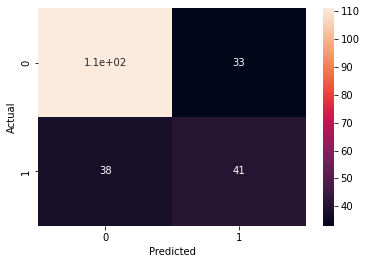

In [12]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#UC-ROC curve helps us visualize how well our machine learning classifier is performing. 

In [19]:
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

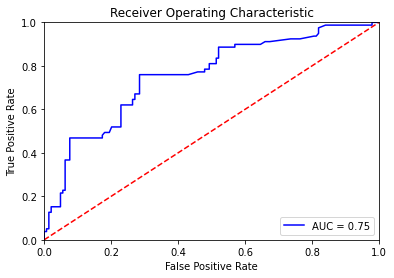

In [20]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


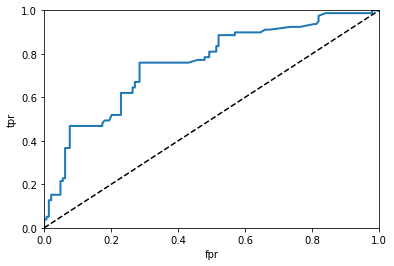